<a href="https://colab.research.google.com/github/eldellobo/22E3/blob/main/Estadistica/Colab/ACA2/ACA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACA 2**

In [1]:
# Cargo las librerias necesarias
#--------------------------------------------------------------
# Manejo de Datos
import pandas as pd
import numpy as np
# Generador de gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Procesamiento y análisis
import statsmodels.api as sm
import math
from scipy import stats
from scipy.stats import pearsonr
# Configuracion para matplotlib
plt.style.use('ggplot')
#Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargo la sabana de datos
sabana = pd.read_excel('/content/drive/MyDrive/CUN-Estadistica/ACA2/1500hogares.xlsx')

In [3]:
# Valido las variables de la sabana
sabana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NID     1500 non-null   int64
 1   PE      1500 non-null   int64
 2   ING     1500 non-null   int64
 3   AL      1500 non-null   int64
 4   AD      1500 non-null   int64
 5   V       1500 non-null   int64
 6   A       1500 non-null   int64
 7   O       1500 non-null   int64
 8   M       1500 non-null   int64
dtypes: int64(9)
memory usage: 105.6 KB


In [4]:
# Convierto en dataframe

h1500 = pd.DataFrame(sabana)

In [5]:
# Tomo una muestra aleatoria de 150 registros y los bloqueo para poder trabajarlos a reiniciar el runtime
h150 = h1500.sample(n=150, random_state=1)

In [6]:
# Valido la muestra aleatoria de los 150 registros
h150.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 91 to 255
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NID     150 non-null    int64
 1   PE      150 non-null    int64
 2   ING     150 non-null    int64
 3   AL      150 non-null    int64
 4   AD      150 non-null    int64
 5   V       150 non-null    int64
 6   A       150 non-null    int64
 7   O       150 non-null    int64
 8   M       150 non-null    int64
dtypes: int64(9)
memory usage: 11.7 KB


In [7]:
# Creo un nuevo dataframe con los campos del ACA2
aca2 = h150[['ING','AL','AD']]

In [8]:
# Valido el nuevo dataframe con los datos para analisis del ACA2
aca2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 91 to 255
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ING     150 non-null    int64
 1   AL      150 non-null    int64
 2   AD      150 non-null    int64
dtypes: int64(3)
memory usage: 4.7 KB


In [9]:
# Creo un dataframe por cada variable para crear la tabla de fecuencia
ing = aca2[['ING']]
al = aca2[['AL']]
ad = aca2[['AD']]

# **ING: INGRESOS FAMILIARES ANUALES**

In [10]:
m = ing.size # Numero de datos
k = round(1 + 3.322 * math.log10(m)) # Numero de intervalos
vMx = ing.max() # Valor Maximo
vMn = ing.min() # Valor Mimo
inf = ing.min() # Limite inferior del primer intervalo
rang = round(vMx - vMn) # Rango(R)
amp = round(rang / k) # Amplitud
dif = (ing.min() - ing.max()) % k
sup = vMx + dif  # Limite superior
f = math.ceil(rang / k) # Frecuencia

In [11]:
# Creo la tabla de frecuencias para la variable ING
intervalos_ing = pd.interval_range( start = vMn[0], end = sup[0], freq = f,  name="Intervalo", closed="left")

df_ing = pd.DataFrame(index=intervalos_ing)
df_ing["LimInf"] = df_ing.index.left
df_ing["LimSup"] = df_ing.index.right
df_ing["Marca"]  = df_ing.index.mid
df_ing["fi"] = pd.cut(ing['ING'] , bins= df_ing.index).value_counts()




In [12]:
sum(df_ing['fi']) # Valido los datos

150

In [13]:
#Obtenemos las frecuencias absolutas acumuladas
#Saco una lista de los valores donde obtengo la FI
Fi = df_ing["fi"].values
#Recorro la lista para ir creando una nueva lista con las sumas
# y obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
  b = c + b
  a.append(b)
df_ing["Fi"] = a

In [14]:
df_ing['x.f'] = df_ing['Marca']*df_ing['fi'] # Creo x.f
sum_fi = sum(df_ing['fi']) # Suma total de fi
sum_ing_xf = sum(df_ing['x.f']) # Suma total de x.f
media_Ing = sum_ing_xf / sum_fi # Media de ING

In [15]:
df_ing['(x.med'] = df_ing['Marca'] - media_Ing # Obtengo x.med
df_ing['(x-xmed).fi'] = df_ing['(x.med']* df_ing['fi'] # Obtengo x-med*fi
df_ing['(x-xmed)^2'] = df_ing['(x-xmed).fi']**2 # 

In [16]:
mediana_Ing = ing['ING'].median() # Mediana
moda_Ing = ing['ING'].mode() # Moda
var_Ing = ing['ING'].var() # Varianza
ds_Ing = ing['ING'].std() # Desviacion Estandar

In [17]:
medidas_ing = pd.DataFrame()
medidas_ing['Medida'] = None
medidas_ing['Valor'] = None
mding = ['Numero de Datos','Valor Maximo','Valor Minimo','Rango','Intervalos', 'Amplitud','Media','Mediana','Moda','Varianza','Desviacion Estandar']
medidas_ing['Medida'] = mding
medidas_ing['Valor'] = [m, vMx[0], vMn[0], rang[0], k, amp[0], media_Ing, mediana_Ing, moda_Ing[0], var_Ing, ds_Ing]

In [18]:
df_ing

,LimInf,LimSup,Marca,fi,Fi,x.f,(x.med,(x-xmed).fi,(x-xmed)^2
Intervalo,,,,,,,,,
"[30146, 33301)",30146,33301,31723.5,9,9,285511.5,-9002.266667,-81020.400000,6.564305e+09
"[33301, 36456)",33301,36456,34878.5,21,30,732448.5,-5847.266667,-122792.600000,1.507802e+10
"[36456, 39611)",36456,39611,38033.5,30,60,1141005.0,-2692.266667,-80768.000000,6.523470e+09
"[39611, 42766)",39611,42766,41188.5,45,105,1853482.5,462.733333,20823.000000,4.335973e+08
"[42766, 45921)",42766,45921,44343.5,21,126,931213.5,3617.733333,75972.400000,5.771806e+09
"[45921, 49076)",45921,49076,47498.5,18,144,854973.0,6772.733333,121909.200000,1.486185e+10
"[49076, 52231)",49076,52231,50653.5,4,148,202614.0,9927.733333,39710.933333,1.576958e+09
"[52231, 55386)",52231,55386,53808.5,2,150,107617.0,13082.733333,26165.466667,6.846316e+08


In [19]:
medidas_ing

,Medida,Valor
0,Numero de Datos,1.500000e+02
1,Valor Maximo,5.537900e+04
2,Valor Minimo,3.014600e+04
3,Rango,2.523300e+04
4,Intervalos,8.000000e+00
5,Amplitud,3.154000e+03
6,Media,4.072577e+04
7,Mediana,4.090850e+04
8,Moda,3.900500e+04
9,Varianza,2.400235e+07


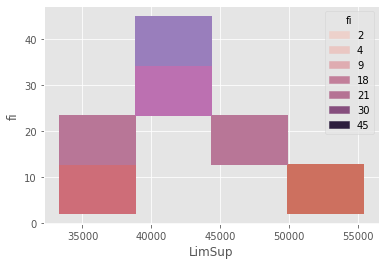

In [20]:
# Utilizo un histograma para validar el Limite superior contra la frecuancia 

sns.histplot(data=df_ing, x="LimSup", y="fi", hue="fi")

# **AL: GASTOS DE ALIMENTACIÓN ANUALES**

In [21]:
am = al.size # Numero de datos
ak = round(1 + 3.322 * math.log10(am)) # Numero de intervalos
avMx = al.max() # Valor Maximo
avMn = al.min() # Valor Mimo
ainf = al.min() # Limite inferior del primer intervalo
arang = round(avMx - avMn) # Rango(R)
aamp = round(arang / ak) # Amplitud
adif = (al.min() - al.max()) % ak
asup = avMx + adif  # Limite superior
af = math.ceil(arang / ak) # Frecuencia

In [22]:
# Creo la tabla de frecuencias para la variable ING
intervalos_al = pd.interval_range( start = avMn[0], end = asup[0], freq = af,  name="Intervalo", closed="left")

df_al = pd.DataFrame(index=intervalos_al)
df_al["LimInf"] = df_al.index.left
df_al["LimSup"] = df_al.index.right
df_al["Marca"]  = df_al.index.mid
df_al["fi"] = pd.cut(al['AL'] , bins= df_al.index).value_counts()

In [23]:
sum(df_al['fi'])

150

In [24]:
#Obtenemos las frecuencias absolutas acumuladas
#Saco una lista de los valores donde obtengo la FI
Fi = df_al["fi"].values
#Recorro la lista para ir creando una nueva lista con las sumas
# y obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
  b = c + b
  a.append(b)
df_al["Fi"] = a

In [25]:
df_al['x.f'] = df_al['Marca']*df_al['fi'] # Creo x.f
asum_fi = sum(df_al['fi']) # Suma total de fi
asum_ing_xf = sum(df_al['x.f']) # Suma total de x.f
media_al = asum_ing_xf / asum_fi # Media de AL
df_al['(x.med'] = df_al['Marca'] - media_al # Obtengo x.med
df_al['(x-xmed).fi'] = df_al['(x.med']* df_al['fi'] # Obtengo x-med*fi
df_al['(x-xmed)^2'] = df_al['(x-xmed).fi']**2 # 
mediana_al = al['AL'].median() # Mediana
moda_al = al['AL'].mode() # Moda
var_al = al['AL'].var() # Varianza
ds_al = al['AL'].std() # Desviacion Estandar



In [26]:
medidas_al = pd.DataFrame()
medidas_al['Medida'] = None
medidas_al['Valor'] = None
ading = ['Numero de Datos','Valor Maximo','Valor Minimo','Rango','Intervalos', 'Amplitud','Media','Mediana','Moda','Varianza','Desviacion Estandar']
medidas_al['Medida'] = ading
medidas_al['Valor'] = [am, avMx[0], avMn[0], arang[0], ak, aamp[0], media_al, mediana_al, moda_al[0], var_al, ds_al]

In [27]:
df_al

,LimInf,LimSup,Marca,fi,Fi,x.f,(x.med,(x-xmed).fi,(x-xmed)^2
Intervalo,,,,,,,,,
"[5547, 6301)",5547,6301,5924.0,7,7,41468.0,-2397.72,-16784.04,2.817040e+08
"[6301, 7055)",6301,7055,6678.0,11,18,73458.0,-1643.72,-18080.92,3.269197e+08
"[7055, 7809)",7055,7809,7432.0,35,53,260120.0,-889.72,-31140.20,9.697121e+08
"[7809, 8563)",7809,8563,8186.0,35,88,286510.0,-135.72,-4750.20,2.256440e+07
"[8563, 9317)",8563,9317,8940.0,31,119,277140.0,618.28,19166.68,3.673616e+08
"[9317, 10071)",9317,10071,9694.0,21,140,203574.0,1372.28,28817.88,8.304702e+08
"[10071, 10825)",10071,10825,10448.0,8,148,83584.0,2126.28,17010.24,2.893483e+08
"[10825, 11579)",10825,11579,11202.0,2,150,22404.0,2880.28,5760.56,3.318405e+07


In [29]:
medidas_al

,Medida,Valor
0,Numero de Datos,1.500000e+02
1,Valor Maximo,1.157500e+04
2,Valor Minimo,5.547000e+03
3,Rango,6.028000e+03
4,Intervalos,8.000000e+00
5,Amplitud,7.540000e+02
6,Media,8.321720e+03
7,Mediana,8.261000e+03
8,Moda,8.592000e+03
9,Varianza,1.324714e+06


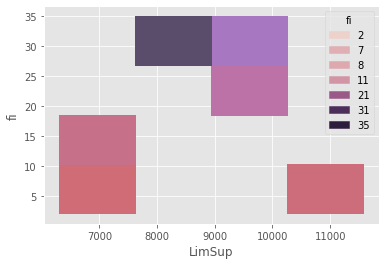

In [30]:
# Utilizo un histograma para validar el Limite superior contra la frecuancia 

sns.histplot(data=df_al, x="LimSup", y="fi", hue="fi")

# **AD: GASTOS ADICIONALES ANUALES**

In [31]:
dm = ad.size # Numero de datos
dk = round(1 + 3.322 * math.log10(dm)) # Numero de intervalos
dvMx = ad.max() # Valor Maximo
dvMn = ad.min() # Valor Mimo
dinf = ad.min() # Limite inferior del primer intervalo
drang = round(dvMx - dvMn) # Rango(R)
damp = round(drang / dk) # Amplitud
ddif = (ad.min() - ad.max()) % k
dsup = dvMx + ddif  # Limite superior
fd = math.ceil(drang / dk) # Frecuencia

In [32]:
# Creo la tabla de frecuencias para la variable AD
intervalos_ad = pd.interval_range( start = dvMn[0], end = dsup[0], freq = fd,  name="Intervalo", closed="left")

df_ad = pd.DataFrame(index=intervalos_ad)
df_ad["LimInf"] = df_ad.index.left
df_ad["LimSup"] = df_ad.index.right
df_ad["Marca"]  = df_ad.index.mid
df_ad["fi"] = pd.cut(ad['AD'] , bins= df_ad.index).value_counts()

In [33]:
sum(df_ad['fi'])

150

In [34]:
#Obtenemos las frecuencias absolutas acumuladas
#Saco una lista de los valores donde obtengo la FI
Fi = df_ad["fi"].values
#Recorro la lista para ir creando una nueva lista con las sumas
# y obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
  b = c + b
  a.append(b)
df_ad["Fi"] = a

In [35]:
df_ad['x.f'] = df_ad['Marca']*df_ad['fi'] # Creo x.f
dsum_fi = sum(df_ad['fi']) # Suma total de fi
dsum_ing_xf = sum(df_ad['x.f']) # Suma total de x.f
media_ad = dsum_ing_xf / dsum_fi # Media de AD
df_ad['(x.med'] = df_ad['Marca'] - media_ad # Obtengo x.med
df_ad['(x-xmed).fi'] = df_ad['(x.med']* df_ad['fi'] # Obtengo x-med*fi
df_ad['(x-xmed)^2'] = df_ad['(x-xmed).fi']**2 # 
mediana_ad = ad['AD'].median() # Mediana
moda_ad = ad['AD'].mode() # Moda
var_ad = ad['AD'].var() # Varianza
ds_ad = ad['AD'].std() # Desviacion Estandar

In [36]:
medidas_ad = pd.DataFrame()
medidas_ad['Medida'] = None
medidas_ad['Valor'] = None
dding = ['Numero de Datos','Valor Maximo','Valor Minimo','Rango','Intervalos', 'Amplitud','Media','Mediana','Moda','Varianza','Desviacion Estandar']
medidas_ad['Medida'] = dding
medidas_ad['Valor'] = [dm, dvMx[0], dvMn[0], drang[0], dk, damp[0], media_ad, mediana_ad, moda_ad[0], var_ad, ds_ad]

In [37]:
df_ad

,LimInf,LimSup,Marca,fi,Fi,x.f,(x.med,(x-xmed).fi,(x-xmed)^2
Intervalo,,,,,,,,,
"[2116, 2644)",2116,2644,2380.0,5,5,11900.0,-1700.16,-8500.80,7.226360e+07
"[2644, 3172)",2644,3172,2908.0,14,19,40712.0,-1172.16,-16410.24,2.692960e+08
"[3172, 3700)",3172,3700,3436.0,31,50,106516.0,-644.16,-19968.96,3.987594e+08
"[3700, 4228)",3700,4228,3964.0,37,87,146668.0,-116.16,-4297.92,1.847212e+07
"[4228, 4756)",4228,4756,4492.0,31,118,139252.0,411.84,12767.04,1.629973e+08
"[4756, 5284)",4756,5284,5020.0,22,140,110440.0,939.84,20676.48,4.275168e+08
"[5284, 5812)",5284,5812,5548.0,8,148,44384.0,1467.84,11742.72,1.378915e+08
"[5812, 6340)",5812,6340,6076.0,2,150,12152.0,1995.84,3991.68,1.593351e+07


In [38]:
medidas_ad

,Medida,Valor
0,Numero de Datos,150.000000
1,Valor Maximo,6333.000000
2,Valor Minimo,2116.000000
3,Rango,4217.000000
4,Intervalos,8.000000
5,Amplitud,527.000000
6,Media,4080.160000
7,Mediana,4019.000000
8,Moda,3407.000000
9,Varianza,615481.913244


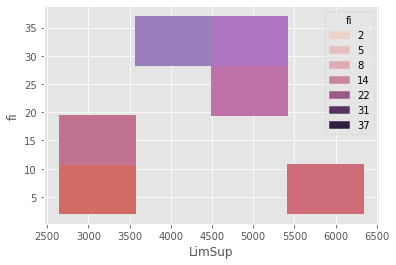

In [39]:
# Utilizo un histograma para validar el Limite superior contra la frecuancia 

sns.histplot(data=df_ad, x="LimSup", y="fi", hue="fi")

# **Correlación lineal**

ING: INGRESOS FAMILIARES ANUALES | AL: GASTOS DE ALIMENTACIÓN ANUALES | AD: GASTOS ADICIONALES ANUALES

In [40]:
# Media de la muestra
pmedia = aca2.mean()
# Varianza de la muestra
pvar = aca2.var()
# Desviación estánda de la muestra
pstd = aca2.std()

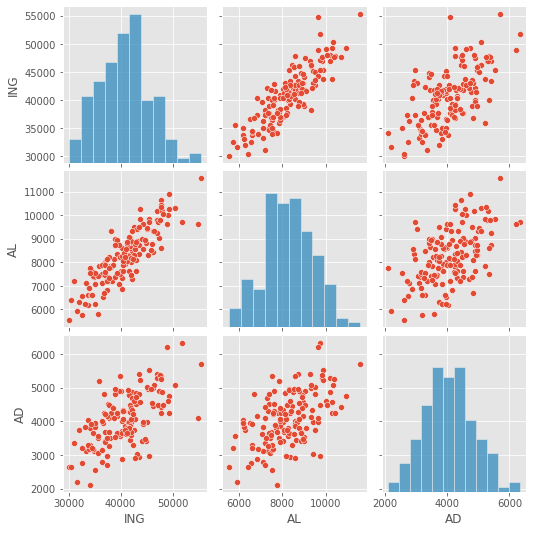

In [41]:
# Utilizo un histograma para validar la distribución de la variable

sns.pairplot(aca2)

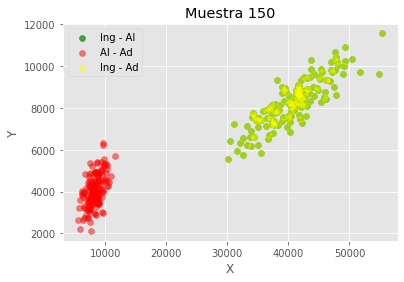

In [47]:
# Creo un diagrama de dispersión para la muestra 
plt.scatter(aca2['ING'],aca2['AL'], color='green', label="Ing - Al", alpha=0.7)
plt.scatter(aca2['AL'],aca2['AD'], color='red', label="Al - Ad", alpha=0.5)
plt.scatter(aca2['ING'],aca2['AL'], color='yellow', label="Ing - Ad", alpha=0.5)
plt.title('Muestra 150')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [48]:
# Metodo Pearson
rPearson1M = aca2.corr(method='pearson')

In [49]:
rPearson1M

,ING,AL,AD
ING,1.000000,0.86074,0.625716
AL,0.860740,1.00000,0.531080
AD,0.625716,0.53108,1.000000


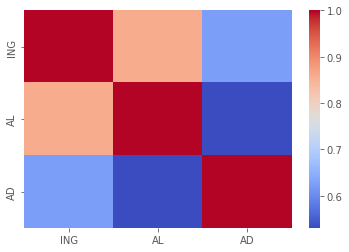

In [50]:
# Mapa de calor de las correlaciones
sns.heatmap(
    rPearson1M,
    xticklabels=rPearson1M.columns,
    yticklabels=rPearson1M.columns,
    cmap='coolwarm'
)

Azul = Correlacion Negativa | Rojo = Correlacion Positiva



In [52]:
dr = pd.DataFrame()
dr['Rango'] = None
dr['Relacion Lineal'] = None
# Tabla de Relacion 
rl = ['Perfecta','Fuerte','Significativa','Moderada','Debil','Muy Debil','Nula']
ra = ['0,96 - 1,0', '0,85 - 0,95','0,70 - 0,84','0,50 - 0,69','0,20 - 0,49',
       '0,10 - 0,19','0,09 - 0,0']
dr['Rango'] = ra
dr['Relacion Lineal'] = rl



In [53]:
dr

,Rango,Relacion Lineal
0,"0,96 - 1,0",Perfecta
1,"0,85 - 0,95",Fuerte
2,"0,70 - 0,84",Significativa
3,"0,50 - 0,69",Moderada
4,"0,20 - 0,49",Debil
5,"0,10 - 0,19",Muy Debil
6,"0,09 - 0,0",Nula


**Interpretación**


---


El valor del índice de correlación varía en el intervalo [-1,1], indicando el signo el sentido de la relación:

Si r =1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante. Si 0 < r < 1 entonces existe una correlación positiva. Si r = 0 entonces no existe relación lineal pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables. Si -1 < r < 0 , existe una correlación negativa. Si r = -1, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación opuesta: cuando una de ellas aumenta, la otra cambia su signo en proporción constante.

Interpretación

* ING - AL [Fuerte]
* ING - AD [Moderada]
* AL - AD [Moderada]


